Performance analysis for NNPZ using different input sizes.
See the [task #15623](https://redmine.isdc.unige.ch/issues/15623).

In [1]:
using IJulia
using CSV
using DataFrames
using StatPlots

In [9]:
perf_data = CSV.read("nnpz_perf_size.csv");

In [10]:
perf_data = by(perf_data, [:Input], df -> DataFrame(Time = mean(df[:Time]), MaxMemory = mean(df[:MaxMemory])))

,Input,Time,MaxMemory
1,5000,22.5348,404.74
2,10000,35.6187,474.268
3,15000,48.0261,573.509
4,30000,84.7866,824.716
5,50000,164.06,1134.58
6,67396,205.039,1540.02


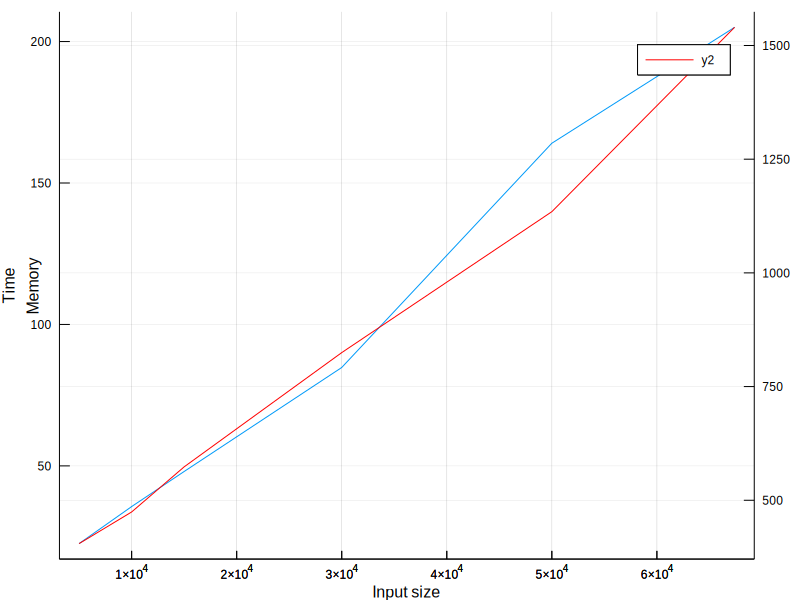

In [31]:
gr(size=(800,600))
plot(perf_data[:Input], perf_data[:Time], xlabel="Input size", ylabel="Time")
plt = twinx()
plot!(plt, perf_data[:Input], perf_data[:MaxMemory], ylabel="Memory", color=:red)

In [26]:
obj_per_second = perf_data[:Input] ./ perf_data[:Time];
obj_per_mb = perf_data[:Input] ./ perf_data[:MaxMemory];

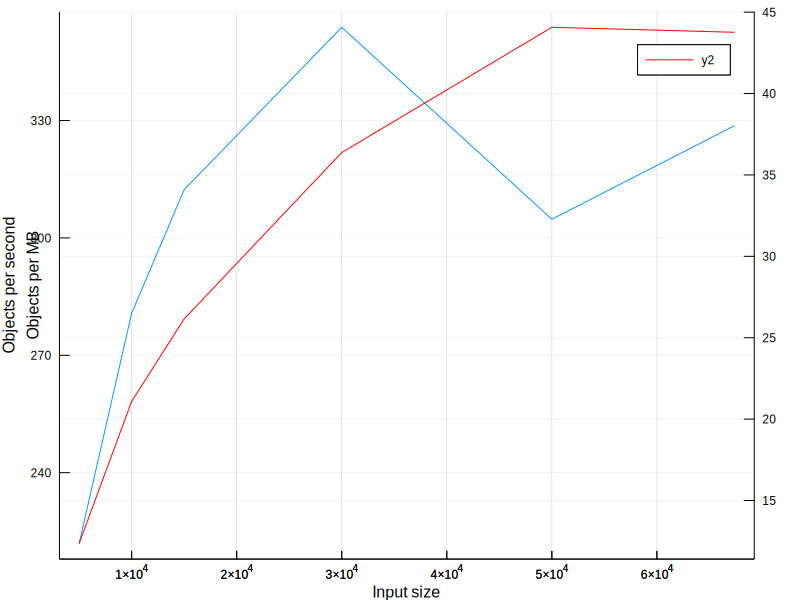

In [30]:
plot(perf_data[:Input], obj_per_second, xlabel="Input size", ylabel="Objects per second")
plt = twinx()
plot!(plt, perf_data[:Input], obj_per_mb, ylabel="Objects per MB", color=:red)